In [ ]:
import pandas as pd
url2="https://raw.githubusercontent.com/kushalpoddar/idyll-dummy-dataset/main/swipes.csv"
url1="https://raw.githubusercontent.com/kushalpoddar/idyll-dummy-dataset/main/users.csv"
swipes=pd.read_csv(url2,low_memory=False)
users=pd.read_csv(url1)
swipes   

# Swipes data cleaning

Devising a scoring function. Profile score is a user’s profile score
having parameters like verified, if 100% completion, number of users
liked him/her, number of matches received, paid subscription or a free
profile, verified user or not, number of likes done vs received, dislike
by likes ratio performed and received,

In [ ]:
swipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66622 entries, 0 to 66621
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     66622 non-null  int64 
 1   first_like_unlike_at   66622 non-null  object
 2   first_msg              169 non-null    object
 3   first_type             66622 non-null  object
 4   is_unmatch             66622 non-null  bool  
 5   like_count             66622 non-null  int64 
 6   p1                     66622 non-null  int64 
 7   p1_extend_at           102 non-null    object
 8   p2                     66622 non-null  int64 
 9   p2_extend_at           151 non-null    object
 10  second_like_unlike_at  4730 non-null   object
 11  second_msg             26 non-null     object
 12  second_type            4730 non-null   object
 13  unmatch_on             147 non-null    object
dtypes: bool(1), int64(4), object(9)
memory usage: 6.7+ MB


In [ ]:
cols=['first_like_unlike_at','first_type','is_unmatch','like_count','p1','p2','second_like_unlike_at','second_type','unmatch_on']
swipes=swipes[cols]
swipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66622 entries, 0 to 66621
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   first_like_unlike_at   66622 non-null  object
 1   first_type             66622 non-null  object
 2   is_unmatch             66622 non-null  bool  
 3   like_count             66622 non-null  int64 
 4   p1                     66622 non-null  int64 
 5   p2                     66622 non-null  int64 
 6   second_like_unlike_at  4730 non-null   object
 7   second_type            4730 non-null   object
 8   unmatch_on             147 non-null    object
dtypes: bool(1), int64(3), object(5)
memory usage: 4.1+ MB


In [ ]:
swipes['unmatch_on'].isna().sum()

66475

In [ ]:
swipes.isna().sum()

first_like_unlike_at         0
first_type                   0
is_unmatch                   0
like_count                   0
p1                           0
p2                           0
second_like_unlike_at    61892
second_type              61892
unmatch_on               66475
dtype: int64

In [ ]:
swipes.p1.value_counts()

11      663
1238    602
2       351
1098    318
831     276
       ... 
112       2
1192      2
1142      1
1188      1
643       1
Name: p1, Length: 1055, dtype: int64

In [ ]:
swipes.p2.value_counts()

170     358
160     350
224     348
450     347
404     347
       ... 
243       1
28        1
27        1
942       1
1402      1
Name: p2, Length: 1042, dtype: int64

In [ ]:
swipes.p1.isna().sum()

0

In [ ]:
swipes = swipes.sort_values(by=['p1', 'first_like_unlike_at'], ascending=[True,True])
swipes.head()

,first_like_unlike_at,first_type,is_unmatch,like_count,p1,p2,second_like_unlike_at,second_type,unmatch_on
212,2023-02-08T05:13:13.430Z,LIKE,True,2,0,35,2023-02-09T06:39:18.142Z,LIKE,2023-02-11T11:31:48.390Z
213,2023-02-08T05:13:24.752Z,LIKE,False,1,0,36,NaN,NaN,NaN
214,2023-02-08T05:13:33.234Z,LIKE,False,2,0,37,2023-02-09T06:40:14.134Z,LIKE,NaN
215,2023-02-08T05:13:41.509Z,DISLIKE,False,1,0,38,NaN,NaN,NaN
216,2023-02-08T05:13:46.215Z,DISLIKE,False,1,0,39,NaN,NaN,NaN


In [ ]:
def count(col:str):
    likes = {}
    dislikes = {}
    for id in range(1405):
        data = swipes[swipes[col]==id]
        # print(data.shape)
        
        l = 0
        d = 0
        for i in range(data.shape[0]):
            if data.iloc[i, 1] == "LIKE":
                l += 1
            else:
                d += 1
        
        likes[id] = l
        dislikes[id] = d
    
    return likes, dislikes

In [ ]:
p1_likes, p1_dislikes = count('p1')
p2_likes, p2_dislikes = count('p2')

In [ ]:
print(p1_likes[0])
print(p1_dislikes[0])
print(p2_likes[0])
print(p2_dislikes[0])

145
85
4
7


In [ ]:
p1_like_dislike = {}
p2_like_dislike = {}
p1_like_p2_like = {}

def div(n,d):
    if d==0:
        return n
    else:
        return n/d

for i in range(1405):
    if p1_dislikes[i] == 0:
        p1_dislikes[i] += 1

    p1_like_dislike[i] = div(p1_likes[i], p1_dislikes[i])
    if p1_like_dislike[i] > 45:
        print(i, p1_like_dislike[i])
    p2_like_dislike[i] = div(p2_likes[i], p2_dislikes[i])
    p1_like_p2_like[i] = div(p1_likes[i], p2_likes[i])

520 47.0
660 87.0
805 227.0
1311 70.0


In [ ]:
print(p1_like_dislike[0])
print(p2_like_dislike[0])
print(p1_like_p2_like[0])

1.7058823529411764
0.5714285714285714
36.25


In [ ]:
import matplotlib.pyplot as plt

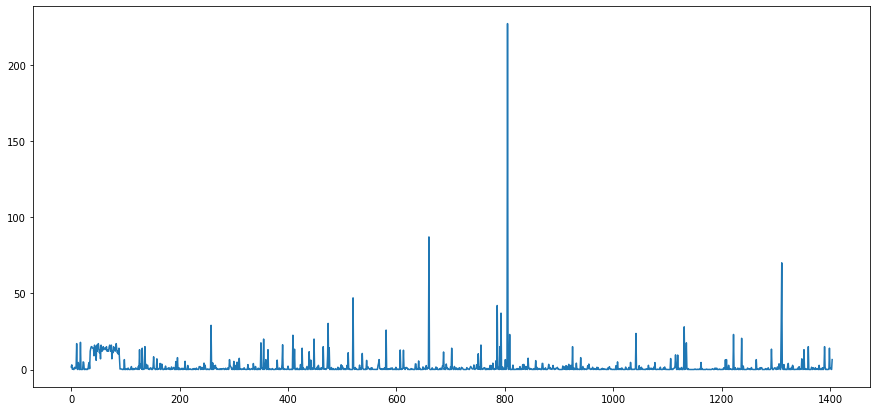

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(p1_like_dislike.values())
plt.show()

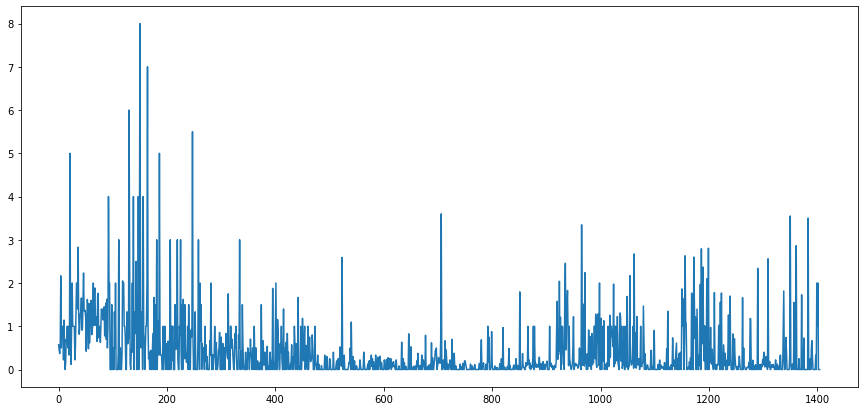

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(p2_like_dislike.values())
plt.show()

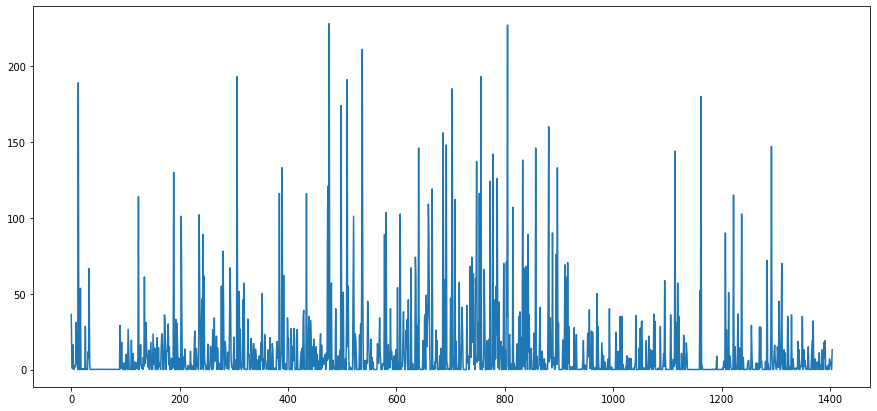

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(p1_like_p2_like.values())
plt.show()

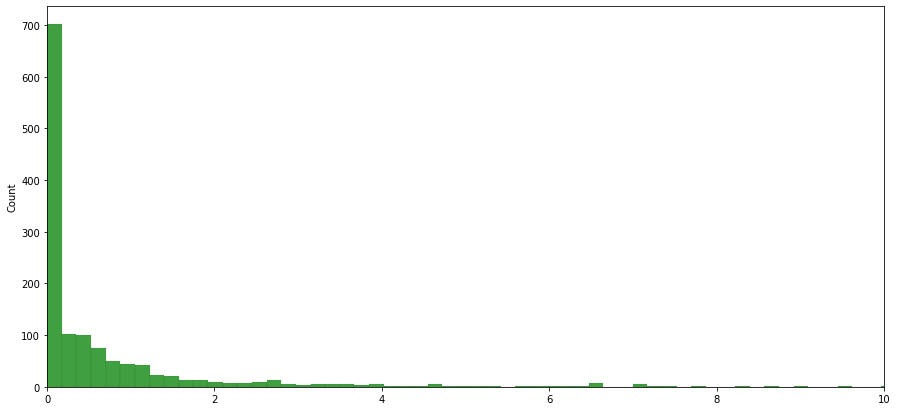

In [ ]:
plt.figure(figsize=(15, 7))
import seaborn as sns
sns.histplot(list(p1_like_dislike.values()), color='g', label = 'actual')
# plt.ylim(0, 20)
plt.xlim(0, 10)
plt.show()

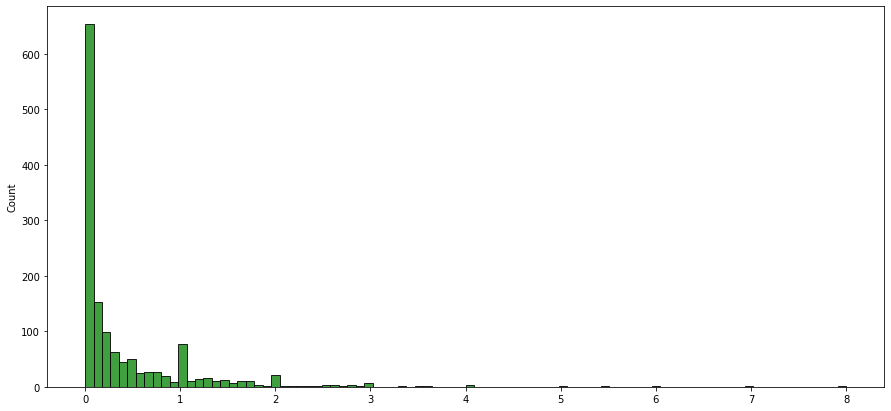

In [ ]:
plt.figure(figsize=(15, 7))
import seaborn as sns
sns.histplot(list(p2_like_dislike.values()), color='g', label = 'actual')
# plt.ylim(0, 20)
# plt.xlim(0, 10)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


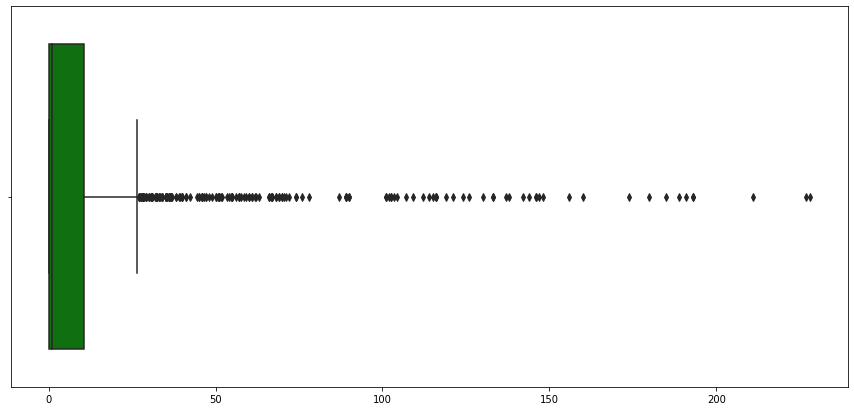

In [ ]:
plt.figure(figsize=(15, 7))
import seaborn as sns
sns.boxplot(list(p1_like_p2_like.values()), color='g',)
# plt.ylim(0, 20)
# plt.xlim(0, 10)
plt.show()

In [ ]:
import numpy as np

In [ ]:
print(np.median(list(p1_likes.values())))
print(np.median(list(p2_likes.values())))
print(np.median(list(p1_dislikes.values())))
print(np.median(list(p2_dislikes.values())))

5.0
1.0
14.0
8.0


In [ ]:
interaction = pd.DataFrame({
'p1 likes': p1_likes,
'p2 likes': p2_likes,
'p1 dislikes': p1_dislikes,
'p2 dislikes': p2_dislikes,

'p1 likes / p1 dislikes':p1_like_dislike,
'p1 likes / p2 dilikes': p2_like_dislike,
'p1 likes / p2 likes': p1_like_p2_like
})

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(interaction)
interaction_scaled = pd.DataFrame(x_scaled, columns=interaction.columns)
interaction_scaled.describe()

,p1 likes,p2 likes,p1 dislikes,p2 dislikes,p1 likes / p1 dislikes,p1 likes / p2 dilikes,p1 likes / p2 likes
count,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000
mean,0.086471,0.092128,0.046719,0.095856,0.008705,0.052459,0.053096
std,0.158171,0.208484,0.074799,0.171524,0.035160,0.091389,0.122386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.021930,0.004673,0.022491,0.027682,0.000794,0.013889,0.004386
75%,0.083333,0.018692,0.057093,0.079585,0.004315,0.062500,0.046784
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
interaction_scaled

,p1 likes,p2 likes,p1 dislikes,p2 dislikes,p1 likes / p1 dislikes,p1 likes / p2 dilikes,p1 likes / p2 likes
0,0.635965,0.018692,0.145329,0.024221,0.007515,0.071429,0.158991
1,0.228070,0.023364,0.027682,0.038062,0.013475,0.056818,0.045614
2,0.210526,0.299065,0.522491,0.602076,0.000698,0.045977,0.003289
3,0.429825,0.028037,0.219723,0.034602,0.003373,0.075000,0.071637
4,0.004386,0.060748,0.032872,0.020761,0.000220,0.270833,0.000337
...,...,...,...,...,...,...,...
1400,0.026316,0.004673,0.013841,0.000000,0.002937,0.125000,0.026316
1401,0.035088,0.009346,0.010381,0.000000,0.005035,0.250000,0.017544
1402,0.008772,0.000000,0.013841,0.003460,0.000979,0.000000,0.008772
1403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
swipes['p1'].value_counts()

11      663
1238    602
2       351
1098    318
831     276
       ... 
20        2
112       2
1142      1
1188      1
643       1
Name: p1, Length: 1055, dtype: int64

In [ ]:
swipes['p2'].value_counts()

170     358
160     350
224     348
404     347
450     347
       ... 
989       1
996       1
1060      1
929       1
1385      1
Name: p2, Length: 1042, dtype: int64

In [ ]:
swipes['is_unmatch'].value_counts()

False    66475
True       147
Name: is_unmatch, dtype: int64

In [ ]:
swipes[swipes['is_unmatch']==1]

,first_like_unlike_at,first_type,is_unmatch,like_count,p1,p2,second_like_unlike_at,second_type,unmatch_on
212,2023-02-08T05:13:13.430Z,LIKE,True,2,0,35,2023-02-09T06:39:18.142Z,LIKE,2023-02-11T11:31:48.390Z
9002,2023-02-09T13:26:31.608Z,LIKE,True,2,2,468,2023-02-10T02:21:28.070Z,LIKE,2023-02-13T19:27:37.333Z
30545,2023-02-14T19:54:16.975Z,LIKE,True,2,2,1029,2023-02-15T00:36:53.312Z,LIKE,2023-02-16T17:45:39.455Z
30554,2023-02-14T19:54:36.951Z,DISLIKE,True,2,2,982,2023-02-24T15:50:59.927Z,DISLIKE,2023-02-24T15:51:06.011Z
11489,2023-02-10T06:29:50.741Z,LIKE,True,2,3,259,2023-02-10T08:52:55.902Z,LIKE,2023-02-10T09:29:00.331Z
...,...,...,...,...,...,...,...,...,...
45540,2023-02-18T17:36:26.651Z,LIKE,True,2,1252,7,2023-02-21T07:31:15.678Z,LIKE,2023-02-24T07:40:33.784Z
48233,2023-02-20T03:54:31.612Z,LIKE,True,2,1270,7,2023-02-21T07:29:20.974Z,LIKE,2023-02-23T17:06:34.654Z
54698,2023-02-22T20:41:23.734Z,LIKE,True,2,1306,1238,2023-02-24T11:41:18.643Z,LIKE,2023-03-02T07:41:35.831Z
54700,2023-02-22T20:41:35.524Z,LIKE,True,2,1306,1227,2023-02-26T08:09:45.056Z,LIKE,2023-03-02T07:41:11.864Z


In [ ]:
swipes['unmatch_on'] = pd.to_datetime(swipes['unmatch_on'])
swipes['first_like_unlike_at'] = pd.to_datetime(swipes['first_like_unlike_at'])
swipes['second_like_unlike_at'] = pd.to_datetime(swipes['second_like_unlike_at'])
swipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66622 entries, 212 to 66544
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   first_like_unlike_at   66622 non-null  datetime64[ns, UTC]
 1   first_type             66622 non-null  object             
 2   is_unmatch             66622 non-null  bool               
 3   like_count             66622 non-null  int64              
 4   p1                     66622 non-null  int64              
 5   p2                     66622 non-null  int64              
 6   second_like_unlike_at  4730 non-null   datetime64[ns, UTC]
 7   second_type            4730 non-null   object             
 8   unmatch_on             147 non-null    datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](3), int64(3), object(2)
memory usage: 4.6+ MB


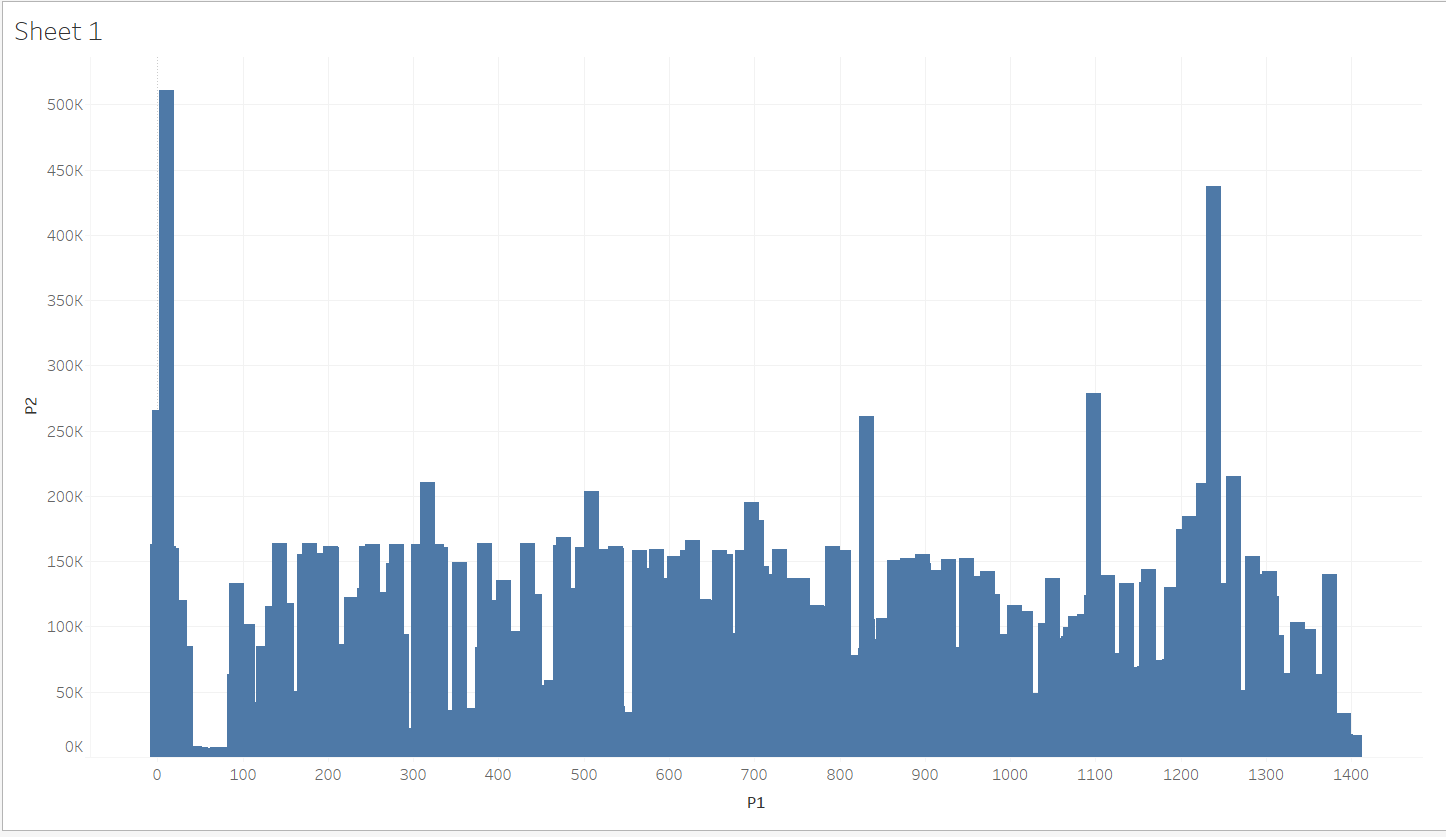

In [ ]:
swipes.head()

,first_like_unlike_at,first_type,is_unmatch,like_count,p1,p2,second_like_unlike_at,second_type,unmatch_on
212,2023-02-08 05:13:13.430000+00:00,LIKE,True,2,0,35,2023-02-09 06:39:18.142000+00:00,LIKE,2023-02-11 11:31:48.390000+00:00
213,2023-02-08 05:13:24.752000+00:00,LIKE,False,1,0,36,NaT,NaN,NaT
214,2023-02-08 05:13:33.234000+00:00,LIKE,False,2,0,37,2023-02-09 06:40:14.134000+00:00,LIKE,NaT
215,2023-02-08 05:13:41.509000+00:00,DISLIKE,False,1,0,38,NaT,NaN,NaT
216,2023-02-08 05:13:46.215000+00:00,DISLIKE,False,1,0,39,NaT,NaN,NaT


swipes.csv - Dataset of ~60k swipes by profiles.

id - Primary ID of the swipe or match

p1 - Primary ID of the first person performing the swipe. If A swipes B then p1 is A

p2 - Primary ID of the person who was swiped by p1. If A swipes B then p2 is B

first_type - LIKE or DISLIKE performed by p1

is_unmatch - If the match was unmatched by any user.

unmatch_on - Timestamp of unmatch

like_count - 1 if single swipe is done. 2 if both have swiped each other

second_type - LIKE or DISLIKE performed by p2 (Only present if like_count is 2) and 2nd user performed the action.

p1_extend_at and p2_extend_at are irrelevant.

In [ ]:
swipes[swipes['p1']==1]

,first_like_unlike_at,first_type,is_unmatch,like_count,p1,p2,second_like_unlike_at,second_type,unmatch_on
7376,2023-02-09 07:24:46.746000+00:00,LIKE,False,1,1,385,NaT,NaN,NaT
7377,2023-02-09 07:24:51.520000+00:00,LIKE,False,1,1,160,NaT,NaN,NaT
7379,2023-02-09 07:24:54.276000+00:00,LIKE,False,1,1,77,NaT,NaN,NaT
7384,2023-02-09 07:25:08.552000+00:00,LIKE,False,1,1,73,NaT,NaN,NaT
7385,2023-02-09 07:25:10.423000+00:00,LIKE,False,1,1,321,NaT,NaN,NaT
...,...,...,...,...,...,...,...,...,...
64510,2023-03-01 12:13:03.699000+00:00,DISLIKE,False,1,1,1337,NaT,NaN,NaT
64511,2023-03-01 12:13:06.092000+00:00,LIKE,False,1,1,523,NaT,NaN,NaT
64512,2023-03-01 12:13:08.077000+00:00,LIKE,False,1,1,924,NaT,NaN,NaT
64513,2023-03-01 12:13:14.760000+00:00,LIKE,False,1,1,1290,NaT,NaN,NaT


In [ ]:
profiles=[]
for i in range(1405):
  temp=swipes[swipes['p1']==i]
  profiles.append(temp)

In [ ]:
print(profiles[0])

                  first_like_unlike_at first_type  is_unmatch  like_count  p1  \
212   2023-02-08 05:13:13.430000+00:00       LIKE        True           2   0   
213   2023-02-08 05:13:24.752000+00:00       LIKE       False           1   0   
214   2023-02-08 05:13:33.234000+00:00       LIKE       False           2   0   
215   2023-02-08 05:13:41.509000+00:00    DISLIKE       False           1   0   
216   2023-02-08 05:13:46.215000+00:00    DISLIKE       False           1   0   
...                                ...        ...         ...         ...  ..   
62883 2023-02-27 20:40:44.524000+00:00       LIKE       False           1   0   
62884 2023-02-27 20:40:48.367000+00:00       LIKE       False           1   0   
62885 2023-02-27 20:40:55.653000+00:00    DISLIKE       False           1   0   
63877 2023-02-28 19:51:48.800000+00:00    DISLIKE       False           1   0   
63878 2023-02-28 19:52:01.085000+00:00    DISLIKE       False           1   0   

         p2            seco

In [ ]:
score=0
users.head()

,_id,bio,college,country,createdAt,dob,email,face_detection_probabilities,gender,height,...,is_verified,mobile,name,status,type,updatedAt,verified_at,what_to_find,who_to_date,is_subscribed
0,0,I am very honest and caring person,"[""Jawaharlal Nehru University""]",IN,2023-02-07T05:23:18.004Z,2002-07-16T00:00:00.000Z,9000000000@get.idyll,[90.7028079032898],M,175.0,...,True,9000000000,Prakhar Sharma,True,U,2023-02-22T11:57:08.616Z,2023-02-22T11:57:04.347Z,C,F,True
1,1,Let's go on a date.,"[""Heritage ""]",IN,2023-02-07T05:44:15.450Z,1999-02-26T00:00:00.000Z,9100000000@get.idyll,[],M,177.0,...,True,9100000000,Amit,True,U,2023-02-21T18:07:44.286Z,2023-02-21T18:01:34.165Z,C,F,True
2,2,Loving life,"[""Jawaharlal Nehru University""]",IN,2023-02-07T05:57:29.233Z,2001-01-08T00:00:00.000Z,9200000000@get.idyll,[88.67224454879761],F,175.0,...,True,9200000000,Ritz,True,U,2023-02-14T10:33:13.373Z,NaN,R,M,True
3,3,Jai Maharashtra\n🥲Bharat Mata ki Jay.....\nInq...,"[""Jawaharlal Nehru University""]",IN,2023-02-07T06:04:39.836Z,2000-08-20T00:00:00.000Z,9300000000@get.idyll,"[90.63367247581482,70.43942511081696,96.189951...",M,177.0,...,True,9300000000,Devesh Shukla,True,U,2023-02-26T20:28:11.956Z,NaN,R,F,True
4,4,🙄,"[""Jawaharlal Nehru University""]",IN,2023-02-07T07:05:14.605Z,2000-07-31T00:00:00.000Z,9400000000@get.idyll,NaN,M,178.0,...,False,9400000000,Aditya bhadoriya,True,U,2023-02-07T07:09:17.627Z,NaN,NS,A,NaN


In [ ]:
users['verified_at'].notna()

0        True
1        True
2       False
3       False
4       False
        ...  
1400    False
1401    False
1402    False
1403    False
1404    False
Name: verified_at, Length: 1405, dtype: bool

In [ ]:
users.iloc[0, :].notna().sum()

23

In [ ]:
matches={}

for i in range(0,1405):
  count=0
  # print(profiles1[i])
  df=profiles[i]
  for j in range(len(df)):

      if df['first_type'].iloc[j]=="LIKE" and df['second_type'].iloc[j]=="LIKE":
        count+=1
  matches[i]=count

print(matches[0])

12


In [ ]:
users['interests'].iloc[0].split(',')

['["Art & Craft"', '"Bollywood"', '"Comedy"', '"Design"', '"Badminton"]']

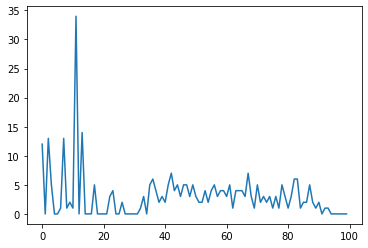

In [ ]:
plt.plot(list(matches.values())[:100])

# User Cleaning

In [ ]:
len(['bio', 'college', 'dob',
       'face_detection_probabilities', 'gender', 'height',
       'interests', 'is_habit_drink', 'is_habit_smoke',
       'what_to_find', 'who_to_date'])

11

In [ ]:
complete_profile_cols = ['']

In [ ]:
users_relevant = ['createdAt', 'gender', 'interests' , 'is_verified', 'status', 'updatedAt', 'who_to_date', 'is_subscribed']

In [ ]:
users_df = users[users_relevant]
users_df

,createdAt,gender,interests,is_verified,status,updatedAt,who_to_date,is_subscribed
0,2023-02-07T05:23:18.004Z,M,"[""Art & Craft"",""Bollywood"",""Comedy"",""Design"",""...",True,True,2023-02-22T11:57:08.616Z,F,True
1,2023-02-07T05:44:15.450Z,M,"[""Singing"",""Writing"",""Dancing"",""Mountains"",""Bi...",True,True,2023-02-21T18:07:44.286Z,F,True
2,2023-02-07T05:57:29.233Z,F,"[""Badminton"",""Design"",""Writing"",""Open-Minded"",...",True,True,2023-02-14T10:33:13.373Z,M,True
3,2023-02-07T06:04:39.836Z,M,"[""Singing"",""Cricket"",""Concerts"",""Vegetarian"",""...",True,True,2023-02-26T20:28:11.956Z,F,True
4,2023-02-07T07:05:14.605Z,M,"[""Football"",""Gym"",""Biryani"",""Sci-fi"",""Cricket""]",False,True,2023-02-07T07:09:17.627Z,A,NaN
...,...,...,...,...,...,...,...,...
1400,2023-03-03T09:53:01.297Z,M,"[""Documentaries"",""Reels"",""Dancing""]",False,True,2023-03-03T09:58:15.338Z,F,NaN
1401,2023-03-03T12:43:15.149Z,M,"[""Rock"",""Vegetarian""]",False,True,2023-03-03T15:30:05.813Z,F,NaN
1402,2023-03-03T12:43:15.633Z,M,"[""Bollywood"",""EDM"",""Coffee"",""Football"",""Biryani""]",False,True,2023-03-03T15:10:17.314Z,F,NaN
1403,2023-03-03T16:12:31.677Z,M,[],False,True,2023-03-03T16:22:51.150Z,F,NaN


In [ ]:
users_df["interests"][0]

'["Art & Craft","Bollywood","Comedy","Design","Badminton"]'

In [ ]:
users_df.isnull().sum()

createdAt          0
gender           147
interests          2
is_verified        1
status             0
updatedAt          0
who_to_date      215
is_subscribed    848
dtype: int64

In [ ]:
users_df['status'].sum()

1113

In [ ]:
users_df  = users_df.drop(users_df[users_df.status==False].index)

In [ ]:
users_df.isnull().sum()

createdAt          0
gender           120
interests          0
is_verified        0
status             0
updatedAt          0
who_to_date      152
is_subscribed    767
dtype: int64

In [ ]:
users_df  = users_df [users_df ['gender'].notna()]

In [ ]:
users_df['who_to_date'].fillna("A", inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
users_df.head()

,createdAt,gender,interests,is_verified,status,updatedAt,who_to_date,is_subscribed
0,2023-02-07T05:23:18.004Z,M,"[""Art & Craft"",""Bollywood"",""Comedy"",""Design"",""...",True,True,2023-02-22T11:57:08.616Z,F,True
1,2023-02-07T05:44:15.450Z,M,"[""Singing"",""Writing"",""Dancing"",""Mountains"",""Bi...",True,True,2023-02-21T18:07:44.286Z,F,True
2,2023-02-07T05:57:29.233Z,F,"[""Badminton"",""Design"",""Writing"",""Open-Minded"",...",True,True,2023-02-14T10:33:13.373Z,M,True
3,2023-02-07T06:04:39.836Z,M,"[""Singing"",""Cricket"",""Concerts"",""Vegetarian"",""...",True,True,2023-02-26T20:28:11.956Z,F,True
4,2023-02-07T07:05:14.605Z,M,"[""Football"",""Gym"",""Biryani"",""Sci-fi"",""Cricket""]",False,True,2023-02-07T07:09:17.627Z,A,NaN


In [ ]:
users_df['interests'] = users_df['interests'].apply(lambda x: x.split(','))

<ipython-input-55-b135539cf460>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df['interests'] = users_df['interests'].apply(lambda x: x.split(','))


In [ ]:
users_df.head()

,createdAt,gender,interests,is_verified,status,updatedAt,who_to_date,is_subscribed
0,2023-02-07T05:23:18.004Z,M,"[[""Art & Craft"", ""Bollywood"", ""Comedy"", ""Desig...",True,True,2023-02-22T11:57:08.616Z,F,True
1,2023-02-07T05:44:15.450Z,M,"[[""Singing"", ""Writing"", ""Dancing"", ""Mountains""...",True,True,2023-02-21T18:07:44.286Z,F,True
2,2023-02-07T05:57:29.233Z,F,"[[""Badminton"", ""Design"", ""Writing"", ""Open-Mind...",True,True,2023-02-14T10:33:13.373Z,M,True
3,2023-02-07T06:04:39.836Z,M,"[[""Singing"", ""Cricket"", ""Concerts"", ""Vegetaria...",True,True,2023-02-26T20:28:11.956Z,F,True
4,2023-02-07T07:05:14.605Z,M,"[[""Football"", ""Gym"", ""Biryani"", ""Sci-fi"", ""Cri...",False,True,2023-02-07T07:09:17.627Z,A,NaN


In [ ]:
users_df[users_df.index==170]

,createdAt,gender,interests,is_verified,status,updatedAt,who_to_date,is_subscribed
170,2023-02-08T15:48:00.207Z,F,"[[""Anime"", ""Manga"", ""LGBTQIA+ ally"", ""Singing""...",False,True,2023-02-08T15:53:52.457Z,M,True


In [ ]:
users_df['is_subscribed'].value_counts()

True    346
Name: is_subscribed, dtype: int64

In [ ]:
comp100_profile = ['bio', 'college', 'dob', 'face_detection_probabilities', 'gender', 'height', 'interests', 'is_habit_drink', 'is_habit_smoke', 'what_to_find', 'who_to_date']

In [ ]:
scores = {}
for i in range(1405):
    score = 0
    if users['verified_at'].iloc[i]:
        score += 10
    
    if users['is_subscribed'].iloc[i]:
        score += 20
    
    # score += 5
    score += users[comp100_profile].iloc[i, :].notna().sum()

    score += min(matches[i] * 2, 10)

    score += min(interaction_scaled.iloc[i, 0] * 100, 10) #P1
    score += min(interaction_scaled.iloc[i, 1] * 100, 10) #P2

    score += min(interaction_scaled.iloc[i, 2] * 100, 10) #P1 - DIS
    score -= min(interaction_scaled.iloc[i, 3] * 100, 10) #P2 - DIS

    score += min((interaction_scaled.iloc[i, 1] + interaction_scaled.iloc[i, 0]) * 100, 5)

    # score += len(users['interests'].iloc[i].split(','))

    scores[i] = score
    if score == 76.70982763638715:
        print(i)

178


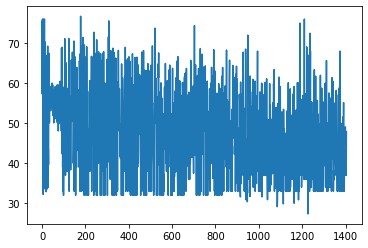

In [ ]:
plt.plot(list(scores.values()))

In [ ]:
min(scores.values()), max(scores.values())

(27.346020761245676, 76.70982763638715)

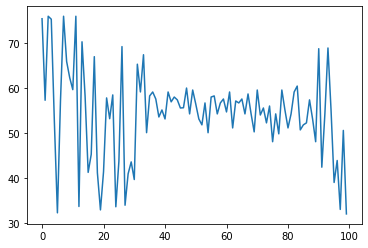

In [ ]:
plt.plot(list(scores.values())[:100])

In [ ]:
print(scores[50])

56.45614035087719
